<a href="https://colab.research.google.com/github/priyarane879/Hotel-Booking-Analysis/blob/main/Priya_Naik_Hotel_Booking_Analysis_EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -Priya Nilesh Naik


# **Project Summary -**

The given dataset is of hotel booking of city hotel and Resort hotel. I have studied given dataset of hotel booking, and discovered some important factors. The dataset contain 119390 and 32 columns.Among 32 column 10 columns contain categorical value and 22 column contain having numeric.
The dataset was having 26.8% of duplicate data and 4 columns having missing value.I have cleaned the data using data wrangling techniques such as by deleting duplicate rows , replacing null
values with "fillna" method , also changed inappropriate datatype with correct datatype, also removed outlier from adr column and merged few columns to get new column. After that I have done Univariate , Bivariate and multivariate analysis using pie chart,
barchart, lineplot, boxplot, heatmap and pair plot. From this analysis I have found that City hotel is busiest hotel than Resort hotel.

# **GitHub Link -**

https://github.com/priyarane879/Hotel-Booking-Analysis/blob/main/Priya_Naik_Hotel_Booking_Analysis_EDA_project.ipynb

# **Problem Statement**


This dataset contains information of hotel booking from 2015 to 2017. There are two types of hotel , city hotel and resort hotel. This dataset include information as when the booking was done, number of adult, children, babies, stay period , country,is guest repeated, room type , deposite type etc.
I have to analyze the data and find the important factors which are responsible for bookings.

#### **Define Your Business Objective?**

Main Objective is to perform exploratory data analysis on dataset and pull out meaningful conclusion about incline in booking and important factors which are responsible for bookings.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:

# Import Libraries

import more_itertools
import numpy as np
import pandas as pd
from numpy import math
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [5]:
#setting maximum display column to 32
pd.set_option('display.max_columns', 32)

In [6]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load Dataset
dataset_hotel = pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Eda/Hotel Bookings.csv')

### Dataset First View

In [8]:
# Dataset First Look
# checking 1st 5 row of dataframe
dataset_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# checking last 5 row of dataframe
dataset_hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
#dataframe.shape function gives us number of column and rows.
dataset_hotel.shape

(119390, 32)

*  Hotel dataset contain 119390 rows and 32 column.

### Dataset Information

In [11]:
# Dataset Info
#using info method we get information about columns, its dtypes, number of entries , number of non-null values.
dataset_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
#Checking for duplicate rows in dataframe
len(dataset_hotel[dataset_hotel.duplicated()])

31994

*   There are 31994 rows which are duplicated.

In [13]:
print(f"From the total data {round(len(dataset_hotel[dataset_hotel.duplicated()])*100/len(dataset_hotel),2)} % are duplicate data.")

From the total data 26.8 % are duplicate data.


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
# Count of missing values of each column
dataset_hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
# Count missing values in the dataset
print(dataset_hotel.isnull().values.sum())

129425


*   In this dataset agent, company,children,country column contain null values.
*   There are total 129425 missing values.

<Axes: >

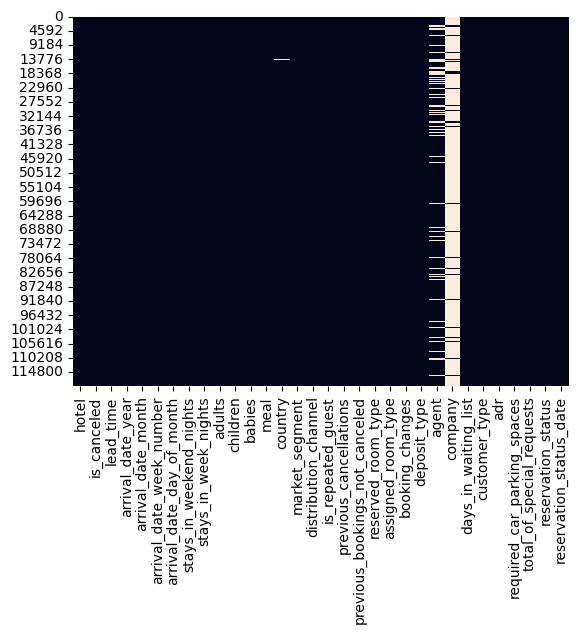

In [16]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset_hotel.isnull(), cbar=False)

### What did you know about your dataset?

1. Dataset contain 119390 rows and 32 column. 10 columns have categorical value and 22 are having numerical value, but from that 31994 rows are duplicated  (almost 27%) .
2. There were 4 columns( agent, country, children and company) are having missing values. Total 94786 missing values was there in dataset.

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
dataset_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
# Dataset Describe
dataset_hotel.describe(include='all')# describe will generate descriptive statistics of each column

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Variables Description

1.   hotel :- It contain type of hotel (Categorical).
2.   is_canceled :- It contains information about booking is cancelled (1) or not (0) (Numeric).
3.   lead_time :- It means number of days that elapsed between the entering date of the booking into the PMS and the arrival date(Numeric).
4.   arrival_date_year :- It is year of arrival date (Numeric).
5.   arrival_date_month :- It is month of arrival date(Numeric).             
6.   arrival_date_week_number:-It is weak number of arrival date(Numeric).
7.   arrival_date_day_of_month:- It is day number of arrival date(Numeric).  
8.   stays_in_weekend_nights:- It is number of weekend(i.e. only on staurday and sunday) nights customer booked to stay in the hotel(Numeric).      
9.   stays_in_week_nights:-It is number of weekend(i.e. from  Monday to saturday) nights customer booked to stay in the hotel(Numeric)
10.  adults:-It is number of adult(Numeric).                        
11.  children:- It is number of children(Numeric)
12.  babies :- It is number of babies(Numeric)
13.  meal:- It is option for meal(Categorical).                           
14.  country:-It is code for country(Categorical).
15.  market_segment:-It is the value for customer from which segment it belong to.(Categorical).
16.  distribution_channel :-How the customer accessed the stay(Categorical).              
17.  is_repeated_guest:-Is this customer is repeated(Numeric).  
18.  previous_cancellations:- Number of previous cancellation of booking by customer(Numeric).           
19.  previous_bookings_not_canceled:- Number of previous booking which are not cancelled(Numeric).  
20.  reserved_room_type:- Type of room reserved(Categorical)             
21.  assigned_room_type :- Type of room assigned to customer(Categorical)             
22.  booking_changes :- Number of changes made to booking(Numeric).                
23.  deposit_type:- Type of deposit(Categorical)                    
24.  agent:- Booked through agent(Numeric).                          
25.  company:- Name of company(Numeric).                         
26.  customer_type:- Type of customer (Categorical)                 
27.  adr:-It is average daily rate(Numeric)                             
28.  required_car_parking_spaces:- Number of car parking required for customer(Numeric).    
29.  total_of_special_requests:- Number of additional special requirement(Numeric).      
30.  reservation_status:- Status of reservation (Categorical).            
31.  reservation_status_date:- Date of the specific status(Categorical)
32. days_in_waiting_list :- Number of days in waiting list(Numeric).

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
for i in dataset_hotel.columns.tolist():
  print("No. of unique values in ",i,"is",dataset_hotel[i].nunique(),".")   #nunique gives no. of distinct elements in each column.

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.

#### 3.1 Removing duplicate data

In [21]:
#removing duplicate rows
dataset_hotel=dataset_hotel.drop_duplicates()

#### 3.2 Handling Null Values

#####3.2.1 Handling Null Values in 'Children' Column

In [22]:
# This will gives us no. of occurance of each unique value from column children.
dataset_hotel['children'].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

##### Here mode value of children column is 0, I will replace null value with 0.

In [23]:
# filling a null values in children  with 0 using fillna()
dataset_hotel["children"].fillna(0, inplace = True)

##### 3.2.2 Handling Null Values in 'Country' Column

In [24]:
dataset_hotel['country'].value_counts() # It will gives us no. of occurance of each unique value from column country.

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

Here I will replace null value with "NoCountry" value.

In [25]:
# filling a null values using fillna()
dataset_hotel["country"].fillna("Nocountry", inplace = True)# replacing null value with "Nocountry".

##### 3.2.3 Handling Null Values in 'Agent' Column

In [26]:
dataset_hotel['agent'].value_counts()  # It will gives us no. of occurance of each unique value from column agent.

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: agent, Length: 333, dtype: int64

Here I will replace null value with "0" value.

In [27]:
# filling a null values in agent  with 0 using fillna()
dataset_hotel["agent"].fillna(0, inplace = True) #replacing null value with 0.

#####3.2.4 Handling Null Values in 'Company' Column

In [28]:
dataset_hotel['company'].value_counts()   # It will gives us no. of occurance of each unique value from company agent.

40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ... 
10.0       1
419.0      1
415.0      1
425.0      1
534.0      1
Name: company, Length: 352, dtype: int64

Here I will replace null value with "0" value.

In [29]:
# filling a null values in company  with 0 using fillna()
dataset_hotel["company"].fillna(0, inplace = True)  #replacing null value with 0.

#### 3.3. Changing inappropriate datatype

In [30]:
#changing datatype of column adults, children and babies,company ,agent  from float to interger
dataset_hotel["adults"]=dataset_hotel["adults"].astype('int64')
dataset_hotel["children"]=dataset_hotel["children"].astype('int64')
dataset_hotel["babies"]=dataset_hotel["babies"].astype('int64')
dataset_hotel["agent"]=dataset_hotel["agent"].astype('int64')
dataset_hotel["company"]=dataset_hotel["company"].astype('int64')

#### 3.4. Merging column to create new feature

##### 3.4.1 Merging Column:-stays_in_weekend_nights and stays_in_week_nights

In [31]:
# adding stays_in_weekend_nights and stays_in_week_nights to get Total stay
dataset_hotel["Total_stay"]=dataset_hotel["stays_in_weekend_nights"]+dataset_hotel["stays_in_week_nights"]

In [32]:
# finding rows whose total stay is zero and still booking status is not canceled
nostay = dataset_hotel[((dataset_hotel['Total_stay']==0) & (dataset_hotel['is_canceled']==0))].index

In [33]:
len(nostay)# length of index list

622

* There are 568 rows with total stay is zero and booking status is confirmed

In [34]:
dataset_hotel.drop(nostay , inplace=True)  # deleting rows which having zero stay and booking status is confirmed.

##### 3.4.2 Merging Column:-adults,children and babies

In [35]:
# merging adults,children,babies to get Total_People
dataset_hotel["Total_People"]=dataset_hotel["adults"]+dataset_hotel["children"]+dataset_hotel["babies"]

In [36]:
# Here I am finding those column with total people zero
nopeople = dataset_hotel[ (dataset_hotel['Total_People'] == 0)].index


In [37]:
len(nopeople) # length of index list

112

* There are 166 rows with total people is zero.

In [38]:
dataset_hotel.drop(nopeople , inplace=True) # deleting rows which having zero people.

#### 3.5. Removal of outlier

By looking at dataset description, I found that adr contain outlier

<Axes: >

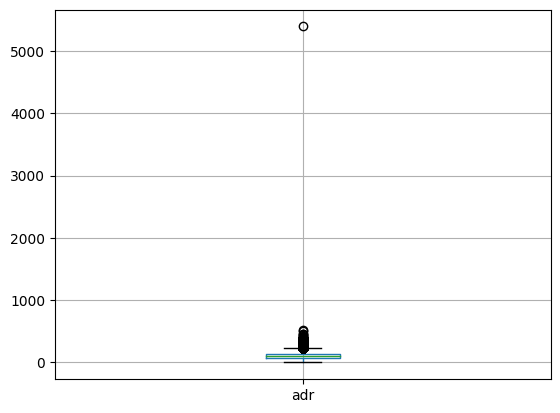

In [39]:
dataset_hotel.boxplot(column="adr") # Make a box plot of adr column.

In [40]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =dataset_hotel["adr"].values
    var = np.sort(var,axis = None)    # sorting 'adr' column value
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))])) #calculating adr values at each percntile 0,10,20,30,40,50,60,70,80,90,100
print ("100 percentile value is ",var[-1])

0 percentile value is -6.38
10 percentile value is 49.0
20 percentile value is 66.0
30 percentile value is 78.0
40 percentile value is 89.0
50 percentile value is 99.0
60 percentile value is 111.0
70 percentile value is 126.0
80 percentile value is 144.0
90 percentile value is 174.4
100 percentile value is  5400.0


* Here we can see there is huge difference between 90th percentile and 100th percentile.

In [41]:
#looking further from the 90th percecntile to 100
for i in range(90,100):
    var =dataset_hotel["adr"].values
    var = np.sort(var,axis = None) # sorting 'adr' column value
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))])) #calculating adr values at each percntile 90,91,92,93,94,95,96,97,98,99,100
print ("100 percentile value is ",var[-1])

90 percentile value is 174.4
91 percentile value is 179.1
92 percentile value is 185.0
93 percentile value is 190.0
94 percentile value is 197.67
95 percentile value is 204.75
96 percentile value is 213.33
97 percentile value is 225.0
98 percentile value is 239.5
99 percentile value is 262.0
100 percentile value is  5400.0


In [42]:
#calculating adr values at each percntile 99.0 to 100
for i in np.arange(0.0, 1.0, 0.1):
    var =dataset_hotel["adr"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))])) #calculating adr values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
print("100 percentile value is ",var[-1])

99.0 percentile value is 262.0
99.1 percentile value is 265.25
99.2 percentile value is 270.0
99.3 percentile value is 273.56
99.4 percentile value is 279.0
99.5 percentile value is 286.0
99.6 percentile value is 293.75
99.7 percentile value is 300.6
99.8 percentile value is 314.5
99.9 percentile value is 335.0
100 percentile value is  5400.0


In [43]:
#removing further outliers based on the 99.99th percentile value
dataset_hotel=dataset_hotel[(dataset_hotel.adr>0 )&(dataset_hotel.adr<=1000)]

<Axes: >

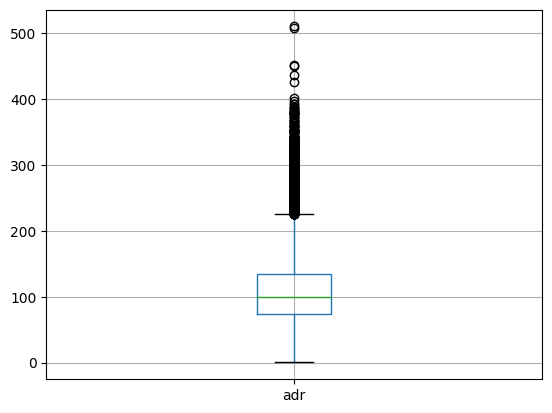

In [44]:
#plotting boxplot for adr after removal of outlier
dataset_hotel.boxplot(column="adr")

### What all manipulations have you done and insights you found?

*   **Removal of Redundant Information**:- As dataset contain 31994 rows duplicated so I simply delete such rows.
*  **Handling missing value** :- There were missing value in children, company, agent, country columns. So I have replace mode value of chidren column i.e. '0' in missing value, also in company and agent I have repalced missing with '0' value and in company missing values are replaced with 'Nocountry' value.
*   **Changing Inappropriate datatype**:- I have changed datatype of  adult, chilldren, babies, agent and company column from float to integer.
* **Merging column to get new feature**:- I have added stays_in_weekend_nights and stays_in_week_nights and got Total_stay as new feature. Also I have added adults,children and babies to get Total_people as new feature.
* **Removal of unwanted rows**:  Removed rows whose total people are zero.
Also removed those column whose total stay is zero and booking status is not cancelled.
* **Removal of outlier**:- There were only one value adr which was very high(5400) so I have removed it.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### 4.1 Univariate Analysis

 #### Chart - 1 Univariate Analysis:- Type Of Hotel

City Hotel      52320
Resort Hotel    33265
Name: hotel, dtype: int64
 


<Axes: ylabel='hotel'>

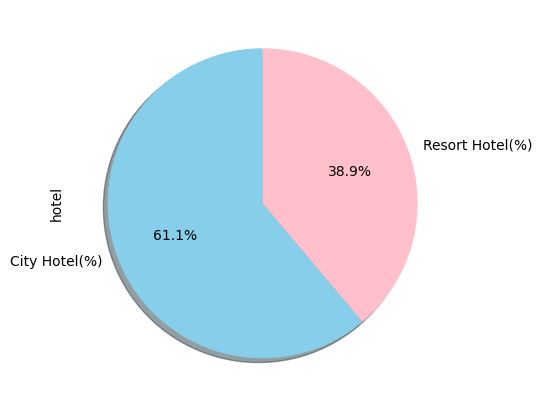

In [45]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(dataset_hotel.hotel.value_counts()) #This will gives us no. of occurance of each unique value from hotel column
print(" ")
# Dependant Variable Column Visualization
dataset_hotel['hotel'].value_counts().plot(kind='pie',
                              figsize=(5,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['City Hotel(%)','Resort Hotel(%)'],
                               colors=['skyblue','pink'],
                               explode=[0,0]
                              )#plotting pie chart of hotel column

##### 1. Why did you pick the specific chart?

A pie chart is a graph that represents the data in circular graph. The pie means whole and slice means the part of whole. The slices of pie shows the relative size of the data. A pie chart requires a list of categorical variables and numerical variables. Hotel has categorical variable. In order to find percentage of booking of different type of hotel, I used pie chart.

##### 2. What is/are the insight(s) found from the chart?

From the total booking of 85585, city hotel has 52320 booking i.e. almost 61% booking are in City hotel and 33265 bookigs i.e. 39% booking are of resort hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* City hotels gives accommodation and meals to travellers while resort hotel
usually has accommodation and meals and additional facility such as sports and leisure facilities, framed with natural enviroment that attracts the visitors beyond the room.
* City hotels is having higher bookings than resort hotel.
* Yes, type of hotel helps to create positive business impact. City hotel can provide more service to attract consumer. Also resort hotel can provide facilities to attact the guest like city hotel.

#### Chart - 2  Univariate Analysis:- Is Canceled

0    61746
1    23839
Name: is_canceled, dtype: int64
 


<Axes: ylabel='is_canceled'>

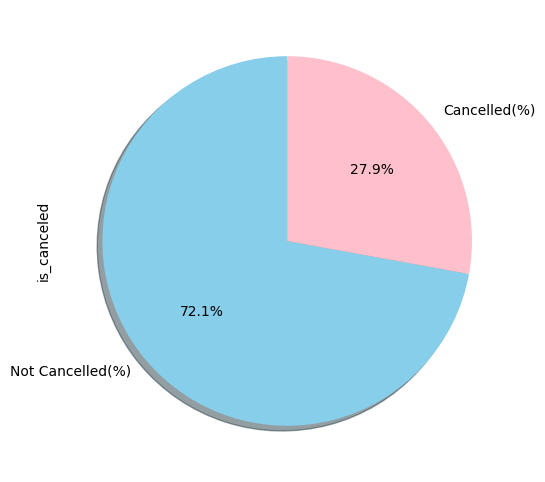

In [46]:
# Chart - 2 visualization code
# Dependant Column Value Counts
print(dataset_hotel['is_canceled'].value_counts()) #This will gives us no. of occurance of each unique value from is_canceled column
print(" ")
# Dependant Variable Column Visualization
dataset_hotel['is_canceled'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Cancelled(%)','Cancelled(%)'],
                               colors=['skyblue','pink'],
                               explode=[0,0]
                              ) #plotting pie chart of is_canceled column

##### 1. Why did you pick the specific chart?

A pie chart is graph which present the data in a circular shape. Pie means whole, and slices means part of whole. The slices of pie show the relative size of the data. A pie chart requires a list of categorical and numerical variables. Using pie chart it is easy to show the percentage comparison through area covered in a circle with different colors. That's Why I choose pie chart to show percentage of cancelled booking and non cancelled booking.

##### 2. What is/are the insight(s) found from the chart?

1. 'O' means booking is not cancelled and '1' means booking is cancelled.
2.  Around 72.5 % booking is not cancelled and 27.9% customer cancelled their booking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The cancelled rate is the percentage of  cancelled  bookings with respect to total bookings.
* Cancellation have negative impact on hotel booking , it directly affect on revenue of hotel.

#### Chart - 3 Univariate Analysis:- Is_repeated_guest


0    82664
1     2921
Name: is_repeated_guest, dtype: int64
 


<Axes: ylabel='is_repeated_guest'>

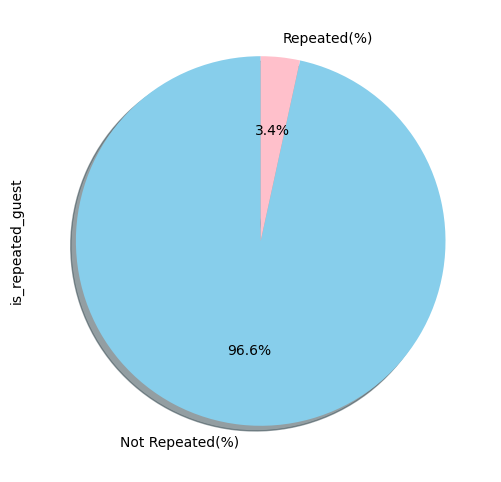

In [47]:
# Chart - 3 visualization code
# Dependant Column Value Counts
print(dataset_hotel.is_repeated_guest.value_counts()) #This will gives us no. of occurance of each unique value from is_repeated_guest column
print(" ")
# Dependant Variable Column Visualization
dataset_hotel['is_repeated_guest'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Repeated(%)','Repeated(%)'],
                               colors=['skyblue','pink'],
                               explode=[0,0]
                              ) #plotting pie chart of is_repeated_guest column

##### 1. Why did you pick the specific chart?

A pie chart is graph which present the data in a circular shape. Pie means whole, and slices means part of whole. The slices of pie show the relative size of the data. A pie chart requires a list of categorical and numerical variables. Using pie chart it is easy to show the percentage comparison through area covered in a circle with different colors. That's Why I choose pie chart to show percentage of repeated guest and non repeated guest.

##### 2. What is/are the insight(s) found from the chart?

1. 'O' means customer is not repeated and '1' means customer is repeated.
2.  Around 96.6 % booking is not repeated and 3.4% customer are having repeated bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this feature can help us to build positive impact on business by taking feedback from customer of hotel's which don't have  repeated customer or very low repeated customer and try to improve services, also we can give discount on booking for repeated customer.

#### Chart - 4 Univariate Analysis:- Meal

BB           66583
SC            9260
HB            8936
Undefined      462
FB             344
Name: meal, dtype: int64
 
BB           0.777975
SC           0.108197
HB           0.104411
Undefined    0.005398
FB           0.004019
Name: meal, dtype: float64


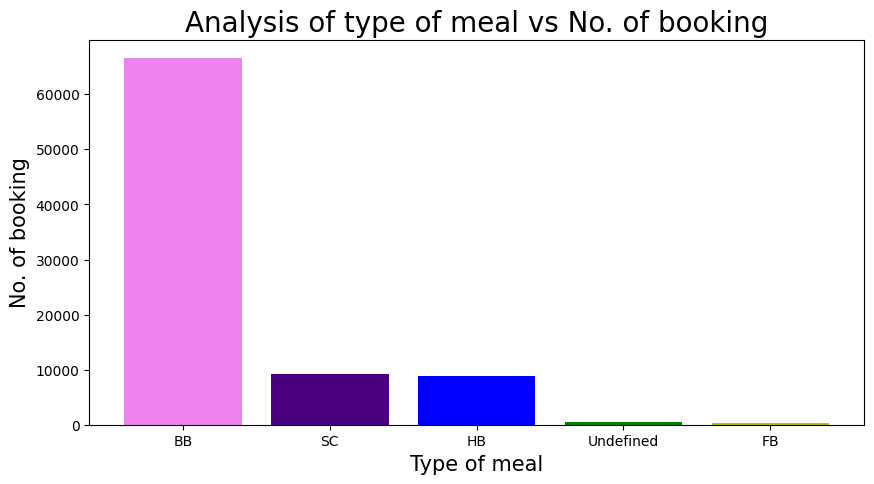

In [48]:
# Chart - 4 visualization code
# Dependant Column Value Counts
print(dataset_hotel['meal'].value_counts())#This will gives us no. of occurance of each unique value from meal column
print(" ")

print(dataset_hotel['meal'].value_counts(normalize=True))# normalize will gives percentage of each unique value from column

count=dict(dataset_hotel['meal'].value_counts())# taking unigue value as key and it's frequency as value into dictionary

xaxis = np.arange(len(count)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(10,5)) # setting chart/figure size
p1 = plt.bar(xaxis, list(count.values()),color=['violet','indigo','b','g','y','orange','r'])

plt.ylabel("No. of booking",fontsize = 15)# ylabel for bar chart
plt.xlabel("Type of meal",fontsize = 15)# xlabel for bar chart
plt.title("Analysis of type of meal vs No. of booking",fontsize = 20)# title for bar chart

plt.xticks(xaxis, list(count.keys()),rotation=0)# to set tick location and labels of x axis
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show number of bookings choose which type of meal I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. There are 4 types of meal option provided by hotel, where
   BB-Bed & Breakfast, HB - Half board, SC-No meal package, FB - Full Board.
2. Maximum customer preferred meal type is BB for both hotel and least preferred is FB .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* BB type of meal is most preferred type of meal which make positive impact on business.
* 66583 customer choose bed & breakfast (BB) type of meal i.e. almost 77%.
* Least preferred type of meal is FB which make negative impact on business.

#### Chart - 5 Univariate Analysis:- Market Segment

Online TA        51245
Offline TA/TO    13626
Direct           11572
Groups            4720
Corporate         4136
Aviation           222
Complementary       62
Undefined            2
Name: market_segment, dtype: int64
Online TA        0.598761
Offline TA/TO    0.159210
Direct           0.135211
Groups           0.055150
Corporate        0.048326
Aviation         0.002594
Complementary    0.000724
Undefined        0.000023
Name: market_segment, dtype: float64
 


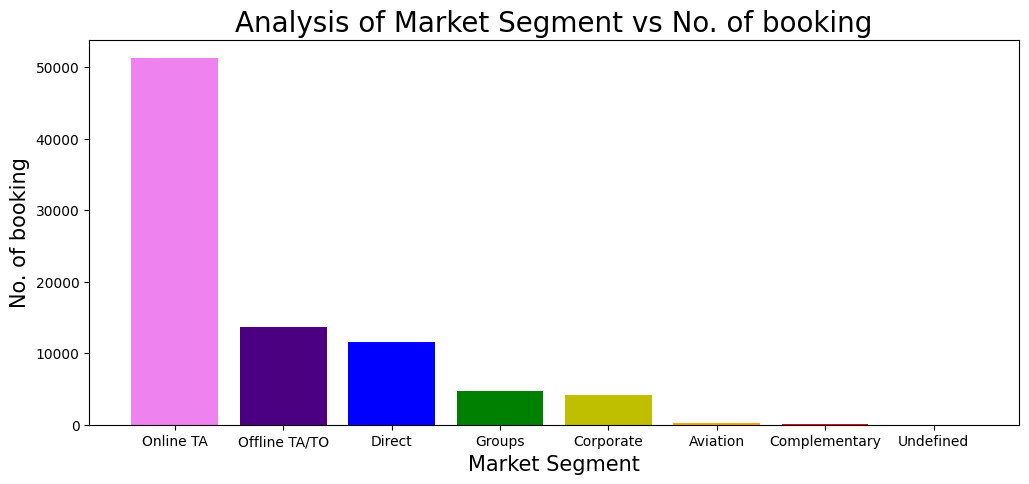

In [49]:
# Chart - 5 visualization code
# Dependant Column Value Counts
print(dataset_hotel['market_segment'].value_counts()) #This will gives us no. of occurance of each unique value from market_segment column
print(dataset_hotel['market_segment'].value_counts(normalize=True))# this will gives percentage of each unique value from column market_segment
print(" ")
count=dict(dataset_hotel['market_segment'].value_counts())# taking unigue value as key and it's frequency as value into dictionary

xaxis = np.arange(len(count)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(12,5))# setting chart/figure size
p1 = plt.bar(xaxis, list(count.values()),color=['violet','indigo','b','g','y','orange','r']) # plotting bar chart

plt.ylabel("No. of booking",fontsize = 15)# ylabel for bar chart
plt.xlabel("Market Segment",fontsize = 15)# xlabel for bar chart
plt.title("Analysis of Market Segment vs No. of booking",fontsize = 20) # title for  bar chart

plt.xticks(xaxis, list(count.keys()),rotation=0) # to set tick location and labels of x axis.
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show booking per market segement  I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

Maximum customer are from "Online TA", (TA means travel agent) market segment almost 60% and least from "Undefined","Complementary" & "Aviation" market segment .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Online travel agent makes positive impact on business. 51245 bookings are booked from online travel agent.
* Aviation, Complementary and undefined are making negative impact on business.

#### Chart - 6 Univariate Analysis:- Distribution Channel

TA/TO        0.797792
Direct       0.142782
Corporate    0.057300
GDS          0.002068
Undefined    0.000058
Name: distribution_channel, dtype: float64
TA/TO        68279
Direct       12220
Corporate     4904
GDS            177
Undefined        5
Name: distribution_channel, dtype: int64
 


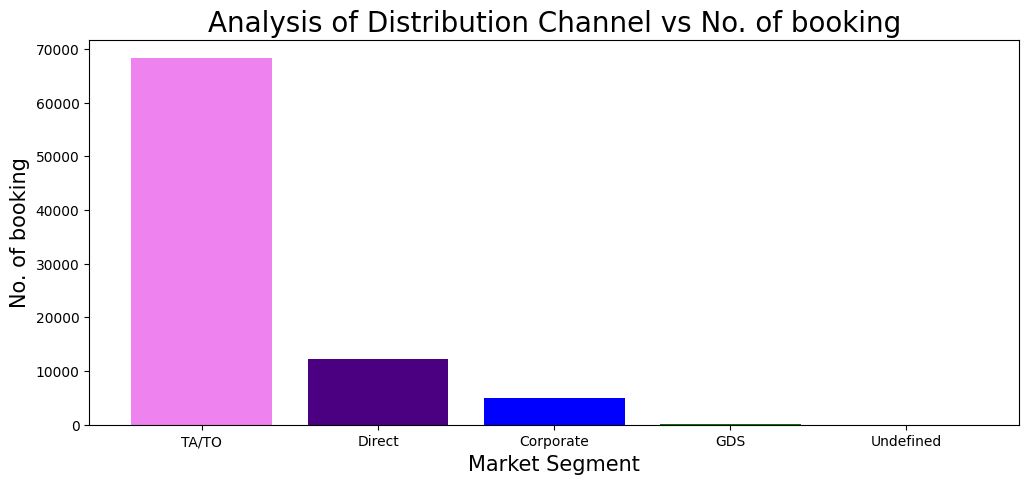

In [50]:
# Chart - 6 visualization code
# Dependant Column Value Counts
print(dataset_hotel['distribution_channel'].value_counts(normalize=True))# this will gives percentage of each unique value from column market_segment
print(dataset_hotel['distribution_channel'].value_counts())#This will gives us no. of occurance of each unique value from distribution_channel column
print(" ")
count=dict(dataset_hotel['distribution_channel'].value_counts())# taking unigue value as key and it's frequency as value into dictionary

xaxis = np.arange(len(count)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(12,5)) # setting chart/figure size
p1 = plt.bar(xaxis, list(count.values()),color=['violet','indigo','b','g','y','orange','r'])

plt.ylabel("No. of booking",fontsize = 15) # ylabel for graph
plt.xlabel("Market Segment",fontsize = 15) # xlabel for graph
plt.title("Analysis of Distribution Channel vs No. of booking",fontsize = 20) # title for graph

plt.xticks(xaxis, list(count.keys()),rotation=0) # to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show booking per distribution channel I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. Maximum booking are done through TA/TO channel.
2. 68279 booking are from TA/TO channel,almost 80% bookings and least are from GDS and Undefined.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. TA/TO distribution channel makes positive impact on business. while GDS and undefined distribution channel makes negative impact on business.
2. We can compare facilities given by TA/TO distribution channel with rest, and can improve facilities of rest of distribution channel.

#### Chart - 7 Univariate Analysis:- Customer Type

Transient          0.825016
Transient-Party    0.132628
Contract           0.036397
Group              0.005959
Name: customer_type, dtype: float64
Transient          70609
Transient-Party    11351
Contract            3115
Group                510
Name: customer_type, dtype: int64
 


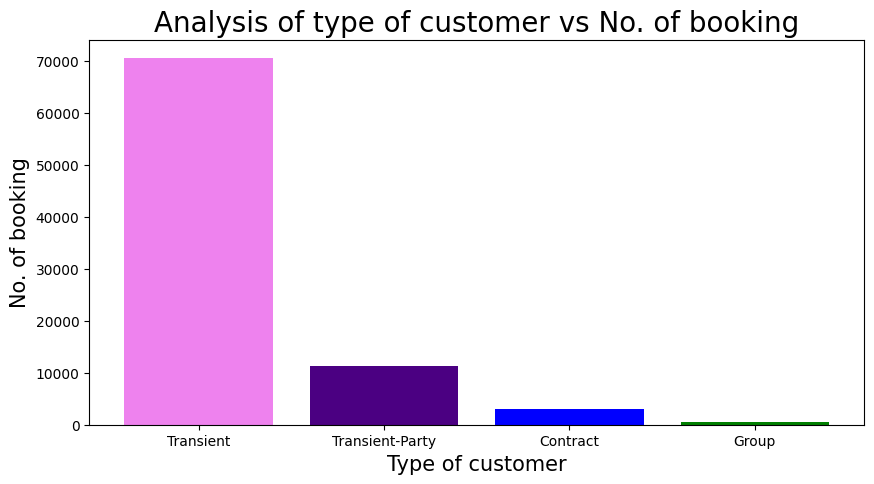

In [51]:
# Chart - 7 visualization code
# Dependant Column Value Counts
print(dataset_hotel['customer_type'].value_counts(normalize=True)) # this will gives percentage of each unique value from column customer_type
print(dataset_hotel['customer_type'].value_counts()) #This will gives us no. of occurance of each unique value from customer_type column
print(" ")
count=dict(dataset_hotel['customer_type'].value_counts())# taking unigue value as key and it's frequency as value into dictionary

xaxis = np.arange(len(count)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(10,5)) # setting chart/figure size
p1 = plt.bar(xaxis, list(count.values()),color=['violet','indigo','b','g','y','orange','r']) #plotting bar graph

plt.ylabel("No. of booking",fontsize = 15)  # ylabel for graph
plt.xlabel("Type of customer",fontsize = 15)# xlabel for graph
plt.title("Analysis of type of customer vs No. of booking",fontsize = 20) # title for graph

plt.xticks(xaxis, list(count.keys()),rotation=0) # to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show booking per distribution channel I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. There are 4 types of customer,
  1. Transient
  2. Transient-Party
  3. Contract
  4. Group
2. 70609 bookings are of type customer Transient i.e. almost 82%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Transient customers are making positive impact on business while group and contract customers are making negative impact on business.

#### Chart - 8 Univariate Analysis:- Reserved Room Type

A    55264
D    17203
E     5939
F     2752
G     1968
B      967
C      896
H      590
L        6
Name: reserved_room_type, dtype: int64
 


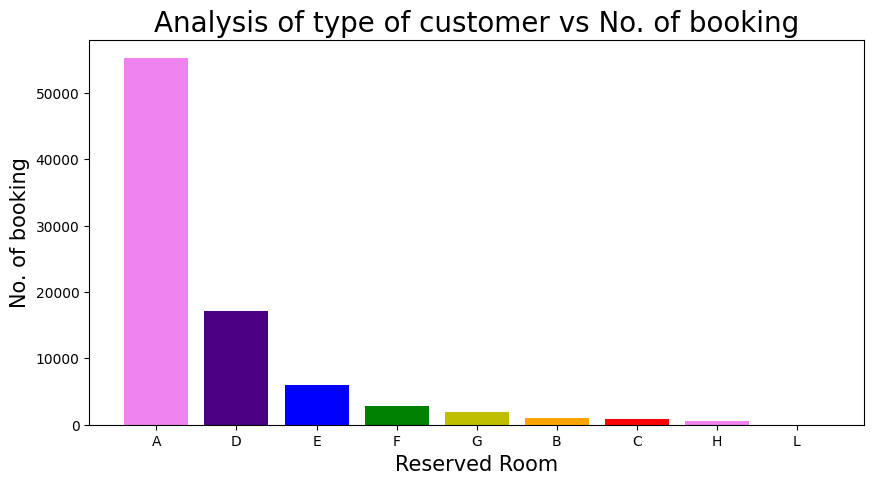

In [52]:
# Chart - 8 visualization code
# Dependant Column Value Counts
print(dataset_hotel['reserved_room_type'].value_counts()) #This will gives us no. of occurance of each unique value from reserved_room_type column
print(" ")
count=dict(dataset_hotel['reserved_room_type'].value_counts())# taking unigue value as key and it's frequency as value into dictionary

xaxis = np.arange(len(count)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(10,5)) # setting chart/figure size
p1 = plt.bar(xaxis, list(count.values()),color=['violet','indigo','b','g','y','orange','r']) # plotting bar chart

plt.ylabel("No. of booking",fontsize = 15)# ylabel for bar chart
plt.xlabel("Reserved Room",fontsize = 15)# xlabel for bar chart
plt.title("Analysis of type of customer vs No. of booking",fontsize = 20) # title for bar chart

plt.xticks(xaxis, list(count.keys()),rotation=0) # to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show booking per reserved room type I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. There are 9 types of rooms provided by hotels namely A,D,E,F,G,B,C,H and L.
2. Most of people prefred to reserve room of type A. There are 55264 bookings for room type A.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Room type A are making positive impact on business while H and L room type are making negative impact on business.

#### Chart - 9 Univariate Analysis:- Country

PRT    26025
GBR    10360
FRA     8785
ESP     7181
DEU     5366
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 178, dtype: int64
 


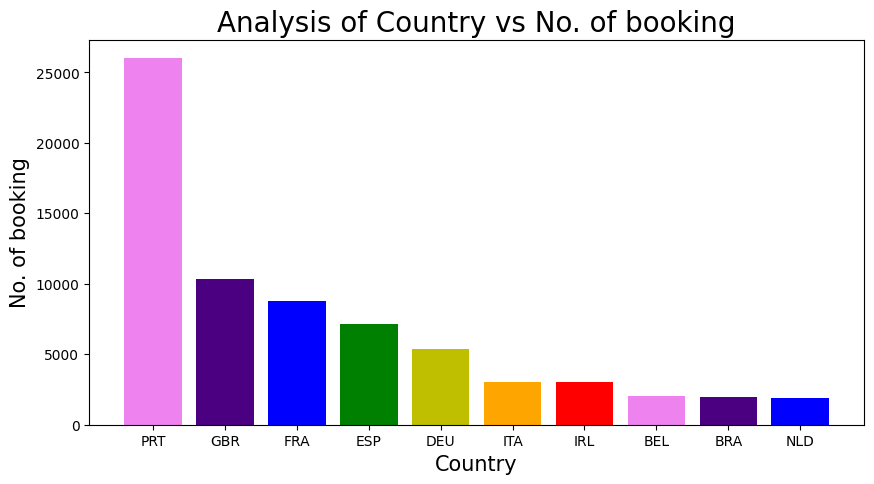

In [53]:
# Chart - 9 visualization code
# Dependant Column Value Counts
print(dataset_hotel['country'].value_counts()) #This will gives us no. of occurance of each unique value from country column
print(" ")

count=dict(dataset_hotel['country'].value_counts())# taking unigue value as key and it's frequency as value into dictionary
dict_count_col=dict(sorted(count.items(), key=lambda x: x[1],reverse=True)) # sorting in descending order
dict_count_col=dict(more_itertools.take(10, dict_count_col.items()))   # taking only 1st 10 key
xaxis = np.arange(len(dict_count_col)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(10,5)) # setting chart/figure size
p1 = plt.bar(xaxis, list(dict_count_col.values()),color=['violet','indigo','b','g','y','orange','r']) # plotting bar chart

plt.ylabel("No. of booking",fontsize = 15) # ylabel for bar chart
plt.xlabel("Country",fontsize = 15) # xlabel for bar chart
plt.title("Analysis of Country vs No. of booking",fontsize = 20)# title for bar chart

plt.xticks(xaxis, list(dict_count_col.keys()),rotation=0)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show top 10 country per booking  I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

 The highest 10 country bookings are as follows.
 1. Portugal
 2. Great Britain
 3. France
 4. Spain
 5. Germany
 6. Italy
 7. Ireland
 8. Belgium
 9. Brazil
 10. Netherland

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Country Portugal is making positive impact on business.

#### Chart - 10 Univariate Analysis:- Month

August       11099
July          9899
May           8209
April         7785
June          7650
March         7365
October       6728
September     6539
February      5955
December      4940
November      4844
January       4572
Name: arrival_date_month, dtype: int64
 


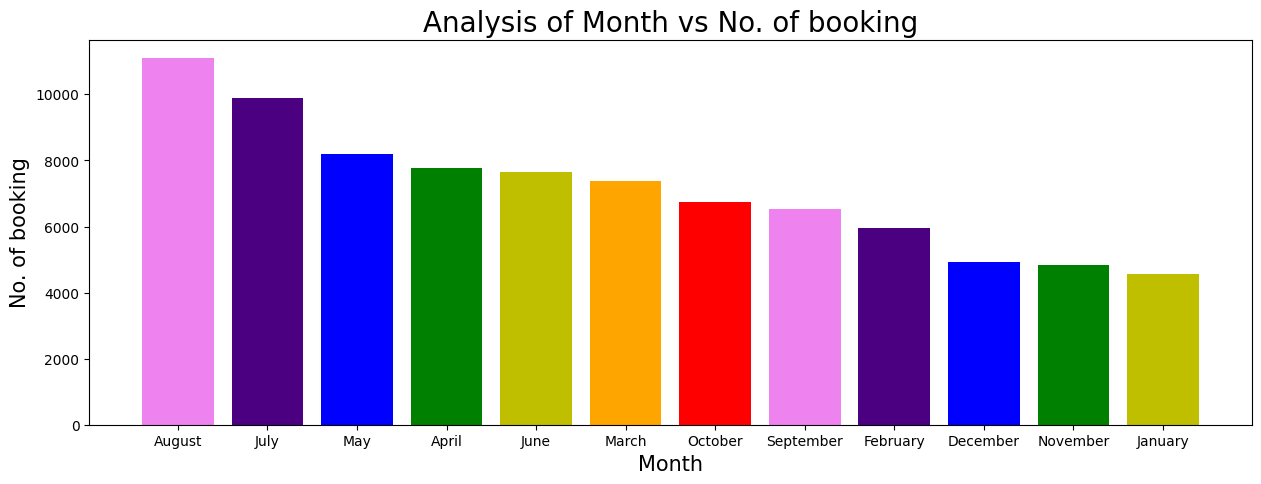

In [54]:
# Chart - 10 visualization code
# Dependant Column Value Counts
print(dataset_hotel['arrival_date_month'].value_counts()) #This will gives us no. of occurance of each unique value from arrival_date_month column
print(" ")
count=dict(dataset_hotel['arrival_date_month'].value_counts())# taking unigue value as key and it's frequency as value into dictionary

xaxis = np.arange(len(count)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(15,5)) # # setting chart/figure size
p1 = plt.bar(xaxis, list(count.values()),color=['violet','indigo','b','g','y','orange','r']) #  plotting bar chart

plt.ylabel("No. of booking",fontsize = 15)# xylabel for barchart
plt.xlabel("Month",fontsize = 15) # xlabel for barchart
plt.title("Analysis of Month vs No. of booking",fontsize = 20)# title for bar chart

plt.xticks(xaxis, list(count.keys()),rotation=0)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show booking per month I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. Most of the bookings are in month August, July, and least are in January.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 August and July  months are making positive impact in hotel business.

#### Chart - 11 Univariate Analysis:- Agent


9      0.334685
240    0.150727
0      0.132068
14     0.038874
7      0.038313
         ...   
497    0.000012
337    0.000012
510    0.000012
165    0.000012
449    0.000012
Name: agent, Length: 333, dtype: float64
 


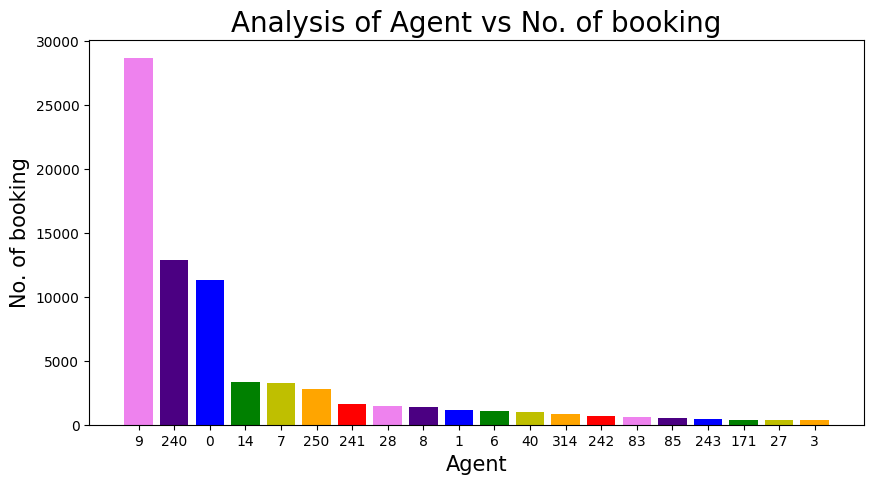

In [55]:
# Chart - 11 visualization code
print(dataset_hotel['agent'].value_counts(normalize=True)) #This will gives us no. of occurance of each unique value from agent column
print(" ")
count=dict(dataset_hotel['agent'].value_counts())# taking unigue value as key and it's frequency as value into dictionary
dict_count_col=dict(sorted(count.items(), key=lambda x: x[1],reverse=True)) # sorting in descending order
dict_count_col=dict(more_itertools.take(20, dict_count_col.items()))   # taking only 1st 20 key
xaxis = np.arange(len(dict_count_col)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(10,5))# setting chart/figure size
p1 = plt.bar(xaxis, list(dict_count_col.values()),color=['violet','indigo','b','g','y','orange','r'])

plt.ylabel("No. of booking",fontsize = 15) # ylabel for bar chart
plt.xlabel("Agent",fontsize = 15)# xlabel for bar chart
plt.title("Analysis of Agent vs No. of booking",fontsize = 20)# title for bar chart

plt.xticks(xaxis, list(dict_count_col.keys()),rotation=0)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show top 20 Agent per booking  I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. Most of the bookings are done by agent No. 9

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Agent 9 is making positive impact on business.

#### 4.2  Bivariate Analysis

#### Chart - 12 Deposite Vs. c (Bivariate with Categorical - Categorical)

deposit_type  hotel       
No Deposit    City Hotel      0.633751
              Resort Hotel    0.323965
Non Refund    City Hotel      0.034397
              Resort Hotel    0.006796
Refundable    City Hotel      0.000419
              Resort Hotel    0.000671
Name: is_canceled, dtype: float64


deposit_type
No Deposit    0.957716
Non Refund    0.041193
Refundable    0.001091
Name: is_canceled, dtype: float64




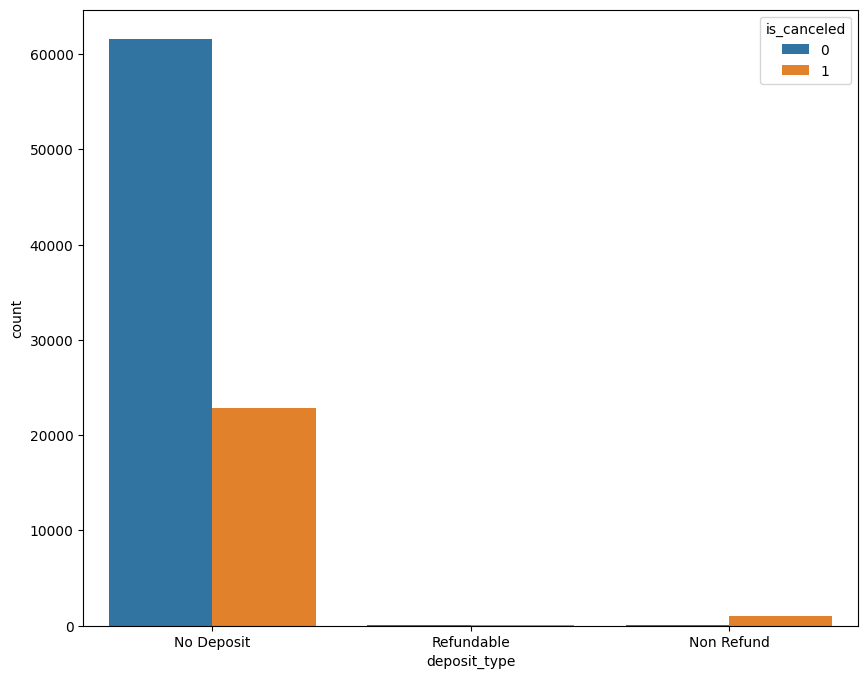

In [56]:
# Chart - 12 visualization code
df_cancelled_booking=dataset_hotel[dataset_hotel['is_canceled']==1] # selecting those booking whose booking status is cancelled
print(df_cancelled_booking.groupby(['deposit_type', 'hotel'])['is_canceled'].count().transform(lambda x: x/x.sum())) # displaying hotalwise percentage of cancelled booking depending on deposite policy
print("")
print("")
print(df_cancelled_booking.groupby(['deposit_type'])['is_canceled'].count().transform(lambda x: x/x.sum())) # displaying percentage of cancelled booking depending on deposite policy
print("")
print("")

fig, ax = plt.subplots(figsize=(10, 8))# setting chart/figure size of subplot
sns.color_palette("husl", 9)
sns.countplot(data=dataset_hotel, x='deposit_type',ax=ax,hue='is_canceled') # ploting countplot of deposite policy vs is_canceled
plt.ylabel("No. of booking",fontsize = 15) # ylabel for bar chart
plt.xlabel("Deposit Type",fontsize = 15)# xlabel for bar chart
plt.title("Analysis of Deposit Type vs Deposit Type",fontsize = 20)# title for bar chart
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To compare proportions of one categorical variable within the same level of another, I use grouped barcharts. To show  Deposite Vs. is_canceled column I use bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. From total cancelled booking 95% bookings are in No deposite policy. And from 95% bookings ,63% bookings are from city hotel and 32% are from Resort hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. By looking at bar chart , I can say no deposite policy is making negative impact on business.

#### Chart - 13 Hotel Vs. Adr (Bivariate with Categorical - Numerical)

          hotel  Mean of average daily rate by hotel
0    City Hotel                           113.197685
1  Resort Hotel                           101.117431
 


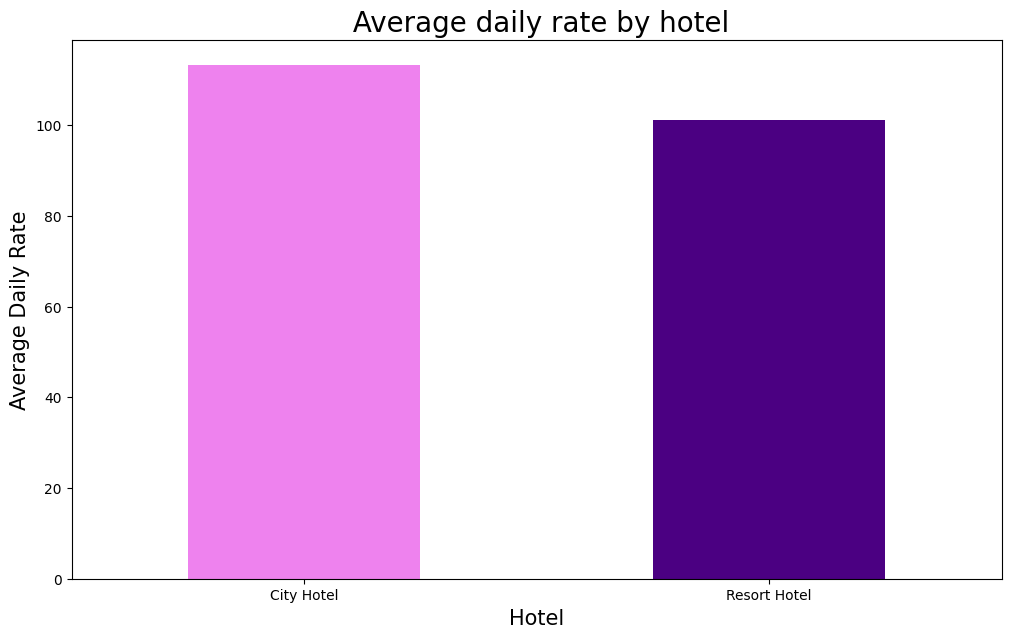

In [57]:
# Chart - 13 visualization code
print(dataset_hotel.groupby(['hotel'])['adr'].mean().reset_index(name="Mean of average daily rate by hotel"))# displaying hotelwise mean of adr
print(" ")


lsthotel=(dataset_hotel.groupby(['hotel'])['adr'].mean()).reset_index()['hotel'].values. tolist() # taking unique value of hotel in list
xaxis = np.arange(len(lsthotel)) # taking xaxis value from 0 to length of unique key - 1

# plotting bar chart of adr vs hotel
plt.rcParams['figure.figsize'] = (12, 7)# setting chart/figure size
color = plt.cm.copper(np.linspace(0, 0.5, 20))
(dataset_hotel.groupby(['hotel'])['adr'].mean()).plot.bar(color = ['violet','indigo'])
plt.title(" Average daily rate by hotel", fontsize = 20) #title for barchart
plt.xlabel('Hotel', fontsize = 15)# xlabel for bar chart
plt.ylabel('Average Daily Rate', fontsize = 15)# ylabel for bar chart
plt.xticks(xaxis, lsthotel,rotation=0)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To compare adr of hotel  I pick bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. City hotel is having slightly higher adr than resort hotel .
2. Mean adr of city hotel is 113.19 while resort hotel having 101.11.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. By looking at bar chart , I can say no deposite policy is making negative impact on business.

#### Chart - 14 Distribution channel Vs. Adr (Bivariate with Categorical - Numerical)

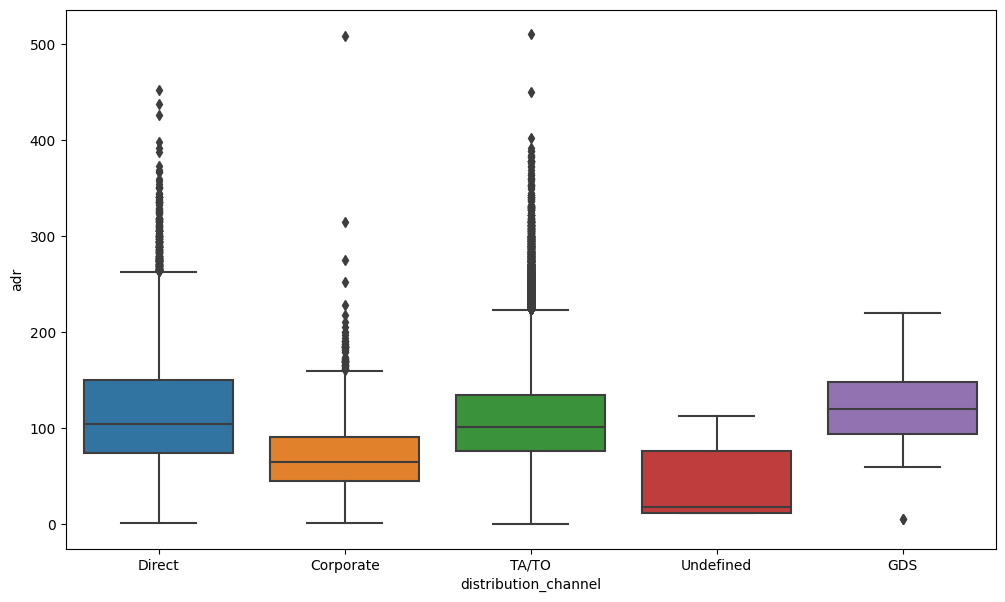

In [58]:
# Chart - 14 visualization code
sns.boxplot(x='distribution_channel',y='adr', data=dataset_hotel)
plt.show()

  distribution_channel  Mean of average daily rate by Distrubution Channel
0                  GDS                                         123.036893 
1               Direct                                         115.961230 
2                TA/TO                                         109.828762 
3            Corporate                                          70.987190 
4            Undefined                                          46.240000 
 


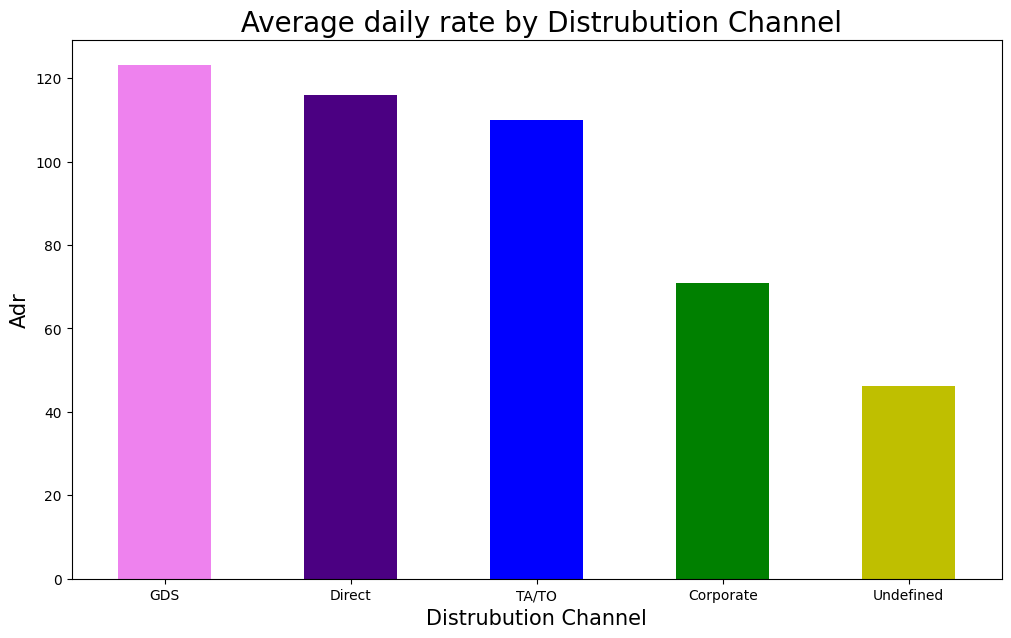

In [59]:
print((dataset_hotel.groupby(['distribution_channel'])['adr'].mean()).sort_values(ascending = False).reset_index(name="Mean of average daily rate by Distrubution Channel"))
print(" ")


lstdist=(dataset_hotel.groupby(['distribution_channel'])['adr'].mean()).sort_values(ascending = False).reset_index()['distribution_channel'].values. tolist() # taking unique value of distributionchannel in list
xaxis = np.arange(len(lstdist)) # taking xaxis value from 0 to length of unique key - 1

# distribution_channel vs. average adr visualization code
# Vizualizing distribution channel vs adr
plt.rcParams['figure.figsize'] = (12, 7) # setting fig size
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset_hotel.groupby(['distribution_channel'])['adr'].mean()).sort_values(ascending = False)).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" Average daily rate by Distrubution Channel", fontsize = 20)# title for bar chart
plt.xlabel('Distrubution Channel', fontsize = 15)# xlabel for bar chart
plt.ylabel('Adr', fontsize = 15)# ylabel for bar chart
plt.xticks(xaxis, lstdist,rotation=0)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

* Here, I used box plot and bar chart to show relationship between distribution
channel and adr.
* Box plot gives visual representation of 5 number sunnary. 5 number summary include minimum, maxiumum, 25th percentile,50th percentile, 75th percentile of particular numerical column.
* A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally.

##### 2. What is/are the insight(s) found from the chart?

1. GDS(Global Distribution System) is giving us highest average daily rate i.e. 123.036 , while undefined and corporate gives us lower average daily rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Channel GDS is giving positive impact on business.

#### Chart - 15  Reserved Room Type Vs. Adr (Bivariate with Categorical - Numerical)

  reserved_room_type  Mean of average daily rate by Reserved Room Type
0                  H                                        190.683627
1                  G                                        184.271169
2                  F                                        172.613637
3                  C                                        163.966540
4                  E                                        128.194673
5                  L                                        124.666667
6                  D                                        123.447879
7                  A                                         94.330436
8                  B                                         93.310476
 


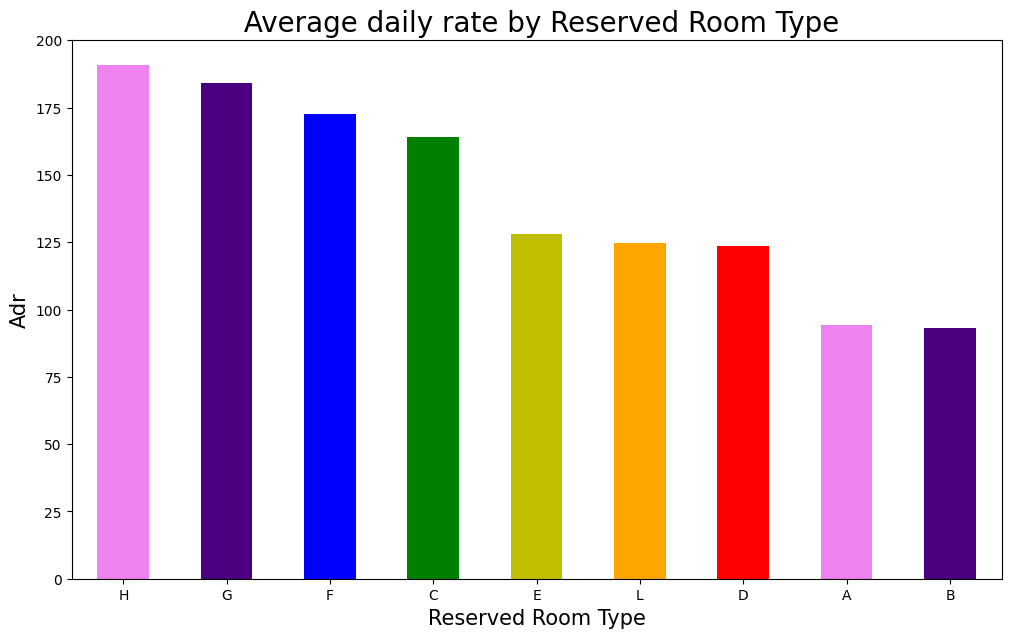

In [60]:
print((dataset_hotel.groupby(['reserved_room_type'])['adr'].mean()).sort_values(ascending = False).reset_index(name="Mean of average daily rate by Reserved Room Type"))
print(" ")


lstroomtype=(dataset_hotel.groupby(['reserved_room_type'])['adr'].mean()).sort_values(ascending = False).reset_index()['reserved_room_type'].values. tolist() # taking unique value of hotel in list
xaxis = np.arange(len(lstroomtype)) # taking xaxis value from 0 to length of unique key - 1

# Reserved Room Type vs. adr visualization code
# Vizualizing Room Type vs. adr
plt.rcParams['figure.figsize'] = (12, 7)# setting chart/figure size
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset_hotel.groupby(['reserved_room_type'])['adr'].mean()).sort_values(ascending = False)).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" Average daily rate by Reserved Room Type", fontsize = 20)# setting title for chart
plt.xlabel('Reserved Room Type', fontsize = 15)# setting xlabel for chart
plt.ylabel('Adr', fontsize = 15)# setting ylabel for chart
plt.xticks(xaxis, lstroomtype,rotation=0)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

* Here, I used box plot and bar chart to show relationship between Room type  and adr.
* Box plot gives visual representation of 5 number sunnary. 5 number summary include minimum, maxiumum, 25th percentile,50th percentile, 75th percentile of particular numerical column.
* A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally.

##### 2. What is/are the insight(s) found from the chart?

1. Room type H gives highest adr, after that room type G, F and C , while room type A, B gives us lower adr.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Room type H, G,F,C is making positive imapct on business.

#### Chart - 15 Arrving Month Vs. Customer Type (Bivariate with Categorical - Categorical)

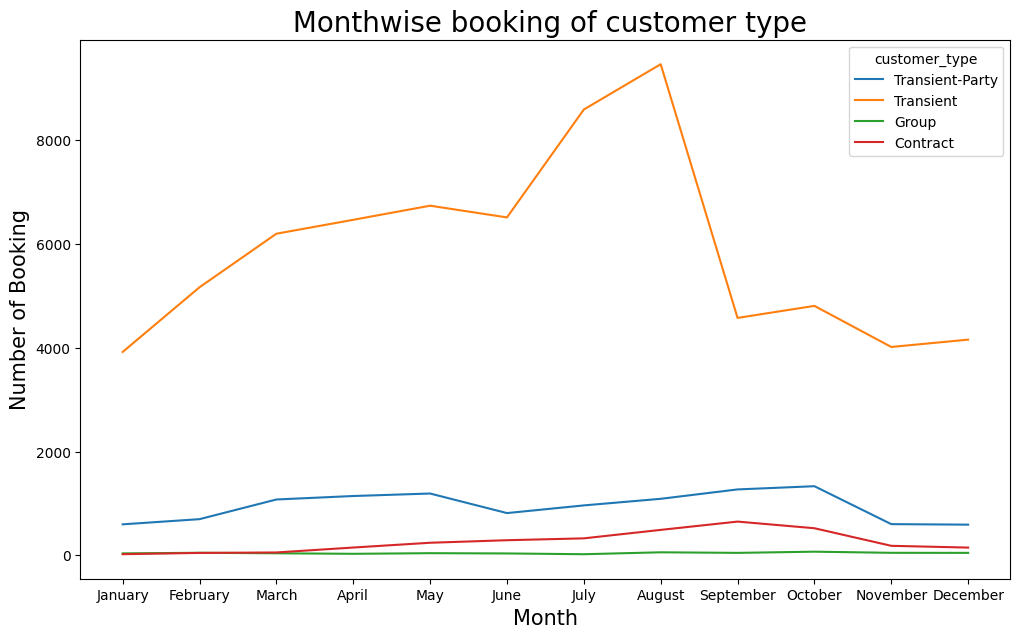

In [61]:
df_gr_arrmonth_custtype = dataset_hotel.groupby(['arrival_date_month', 'customer_type']).agg('count').reset_index()  # group by arrival_date_month and customer_type
df_gr_arrmonth_custtype = df_gr_arrmonth_custtype.iloc[:, :3]   # taking only 1st 3 columns
df_gr_arrmonth_custtype.set_axis([*df_gr_arrmonth_custtype.columns[:-1], 'Count_of_consumer'], axis=1, inplace=True) #renaming last column name with count_of_consumer

# this is dictsionary with with key name as month name ans value as number
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df_gr_arrmonth_custtype=df_gr_arrmonth_custtype.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))# here we are sorting data monthwise.

sns.lineplot(data=df_gr_arrmonth_custtype, x="arrival_date_month", y="Count_of_consumer", hue="customer_type") # plotting lineplot
plt.title(" Monthwise booking of customer type", fontsize = 20)# setting title for chart
plt.xlabel('Month', fontsize = 15)# setting xlabel for chart
plt.ylabel('Number of Booking', fontsize = 15)# setting ylabel for chart
plt.show()


##### 1. Why did you pick the specific chart?

To show changes in value, a line chart (also known as a line plot or line graph) connects points using line segments from left to right. The vertical axis displays values for an interest metric along the horizontal axis' continuous progression, which is frequently that of time. So in order to find which customer type likely to book hotel in which month, I pick line chart.

##### 2. What is/are the insight(s) found from the chart?

1. From June to August there is rise in booking of Customer Type Transient, also we can see sudden surge in August for customer type "Transient".
2. From March to May and from June to October  rise in booking of customer type "Transient-Party" .
3. Highest booking for customer type "Contract" is month September .
4. For customer type "Group", it is constantly low from January to December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. From June to August there is surge in booking for transient customer so these month are creating positive impact on business

#### Chart - 16  Total Stay Vs. Hotel (Bivariate with Numerical - Categorical)

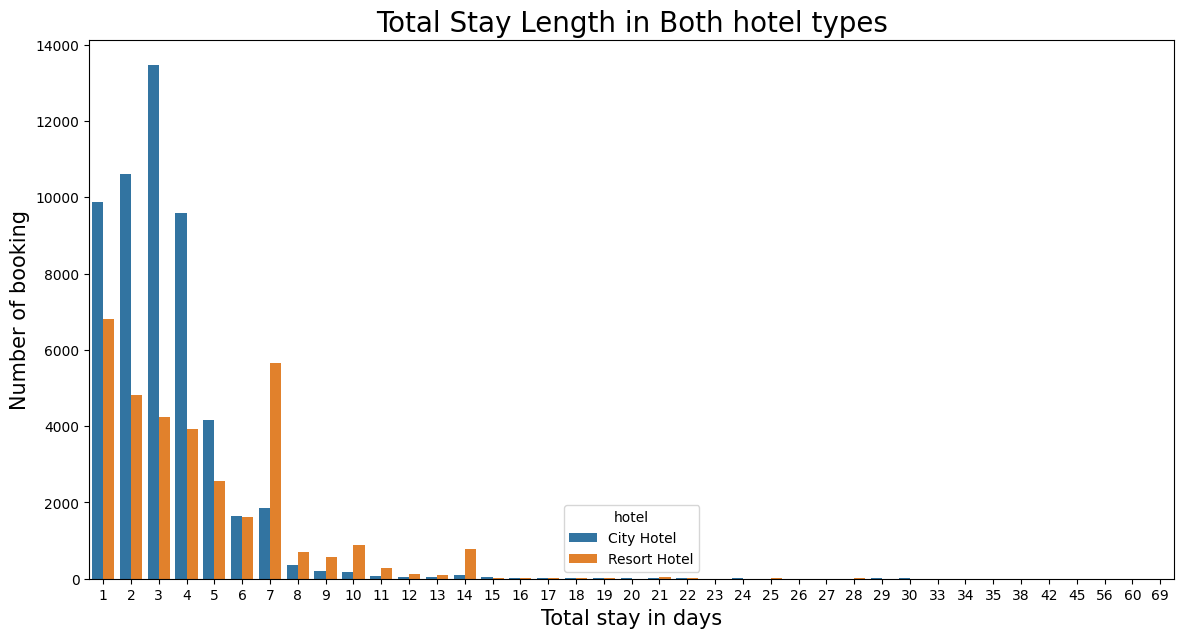

In [62]:
df_gf_total_stay_people = dataset_hotel.groupby(['Total_stay', 'hotel']).agg('count').reset_index()  # group by total stay and hotel
df_gf_total_stay_people = df_gf_total_stay_people.iloc[:, :3]  # taking 1st 3 columns
df_gf_total_stay_people.set_axis([*df_gf_total_stay_people.columns[:-1], 'Count_of_consumer'], axis=1, inplace=True) #renaming last column name with count_of_consumer

plt.figure(figsize=(14,7))# setting chart/figure size
sns.barplot(x='Total_stay',y='Count_of_consumer', data=df_gf_total_stay_people,hue='hotel') #plotting bar chart
plt.title('Total Stay Length in Both hotel types', fontsize=20)# setting title for chart
plt.xlabel('Total stay in days',fontsize=15)# setting xlabel for chart
plt.ylabel('Number of booking', fontsize=15)# setting ylabel for chart
plt.show()

Let's look at customer's booking who stay less than or equal to 7 days.

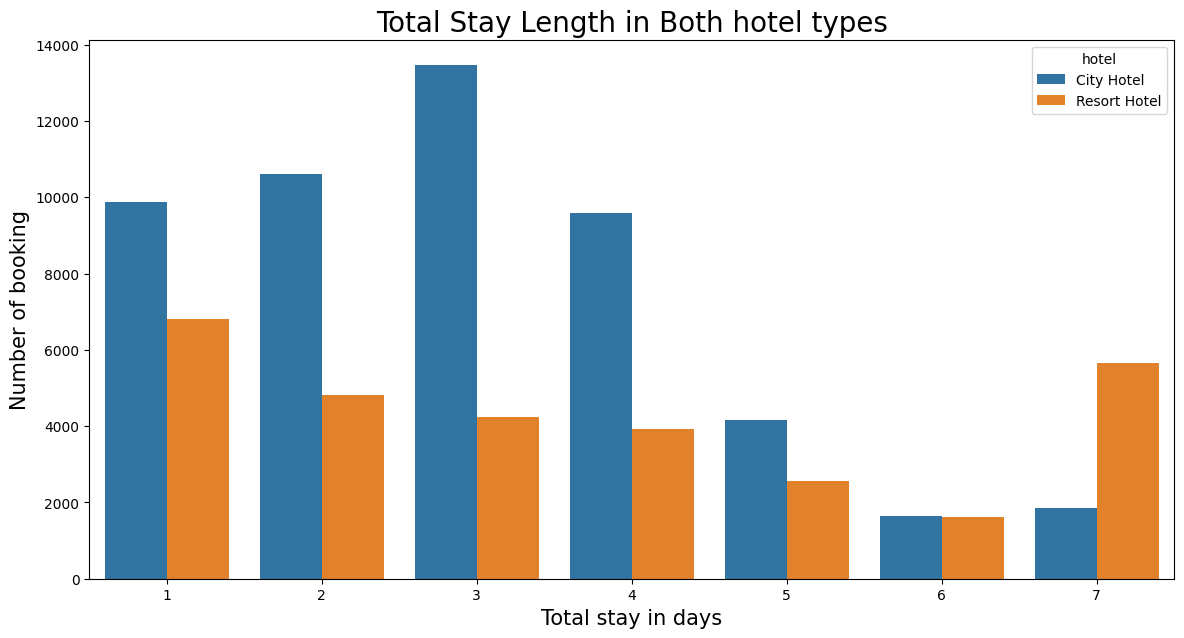

In [63]:
#taking only those rows who's stay is less than or equal to 7.
df_gp_total_stay_people_less7=df_gf_total_stay_people[df_gf_total_stay_people['Total_stay']<=7]
plt.figure(figsize=(14,7))# setting chart/figure size
sns.barplot(x='Total_stay',y='Count_of_consumer', data=df_gp_total_stay_people_less7,hue='hotel')#plotting barplot
plt.title('Total Stay Length in Both hotel types', fontsize=20)# setting title
plt.xlabel('Total stay in days',fontsize=15)# setting xlabel
plt.ylabel('Number of booking', fontsize=15)# setting ylabel
plt.show()

Let's look at customer stay greater than 7 days and less than equal to 25 days.

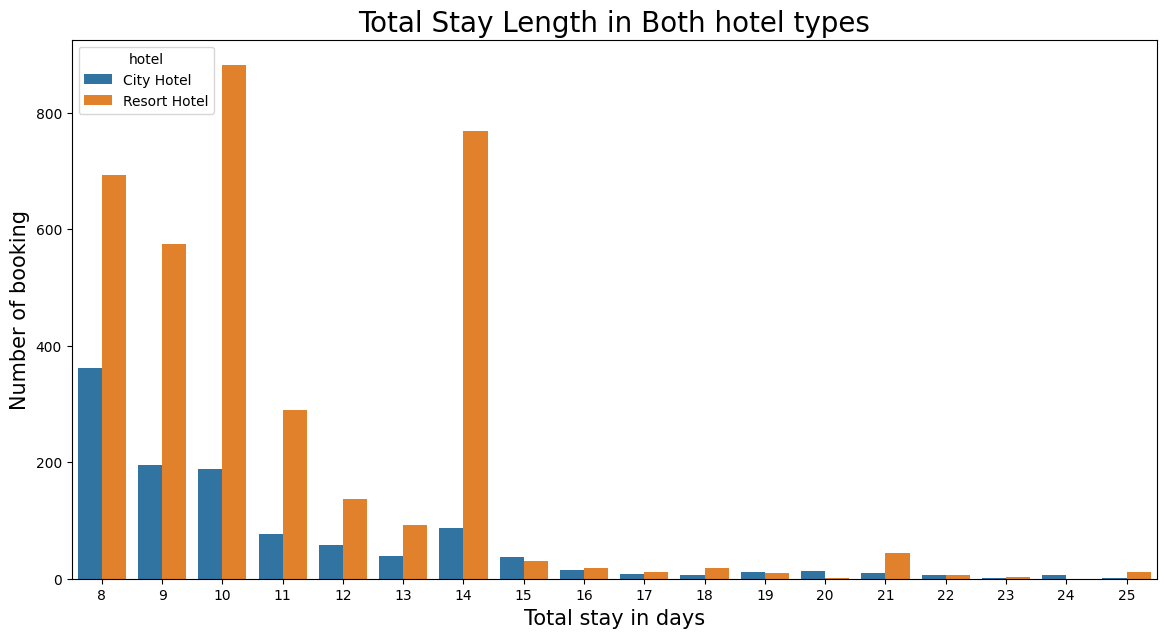

In [64]:
#taking only those rows who's stay is greater than 7 and less than and equal to 25.
df_gf_total_stay_people_greater7=df_gf_total_stay_people[((df_gf_total_stay_people['Total_stay']>7) & (df_gf_total_stay_people['Total_stay']<=25))]
plt.figure(figsize=(14,7)) # setting chart/figure size
sns.barplot(x='Total_stay',y='Count_of_consumer', data=df_gf_total_stay_people_greater7,hue='hotel') #plotting barplot
plt.title('Total Stay Length in Both hotel types', fontsize=20)# setting title
plt.xlabel('Total stay in days',fontsize=15)# setting xlabel
plt.ylabel('Number of booking', fontsize=15)# setting ylabel
plt.show()

Let's look at customer stay greater than 25 days.

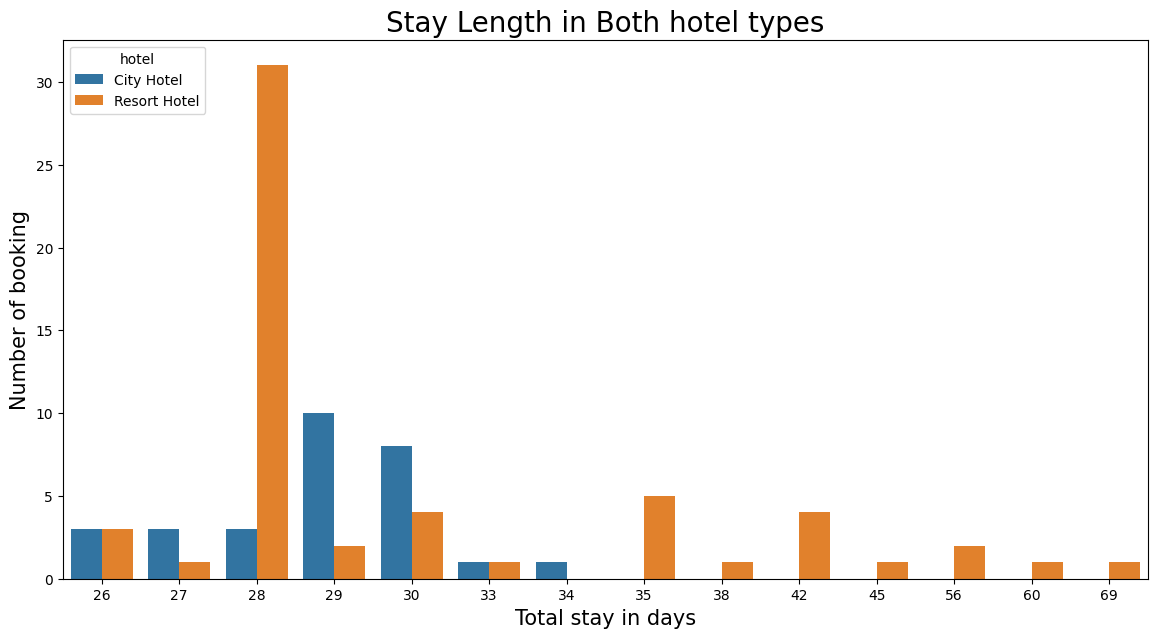

In [65]:
#taking only those rows who's stay is greater than 25
df_gf_total_stay_people_greater25=df_gf_total_stay_people[(df_gf_total_stay_people['Total_stay']>25) ]
plt.figure(figsize=(14,7))# setting chart/figure size
#plotting barplot
sns.barplot(x='Total_stay',y='Count_of_consumer', data=df_gf_total_stay_people_greater25,hue='hotel')
plt.title('Stay Length in Both hotel types', fontsize=20)# setting title for barplot
plt.xlabel('Total stay in days',fontsize=15)# setting xlabel
plt.ylabel('Number of booking', fontsize=15)# setting ylabel
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To compare proportions of one categorical variable within the same level of another, I use grouped barcharts. To show  total stay Vs. hotel column I use bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. People prefer city hotel to stay less than 7 days. And for more than 7 days people prefer to book resort hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Resort hotel can provide facilities to attract people whose stay is less than 7.

#### Chart - 17  Total Stay Vs. ADR (Bivariate with Numerical - Numerical)

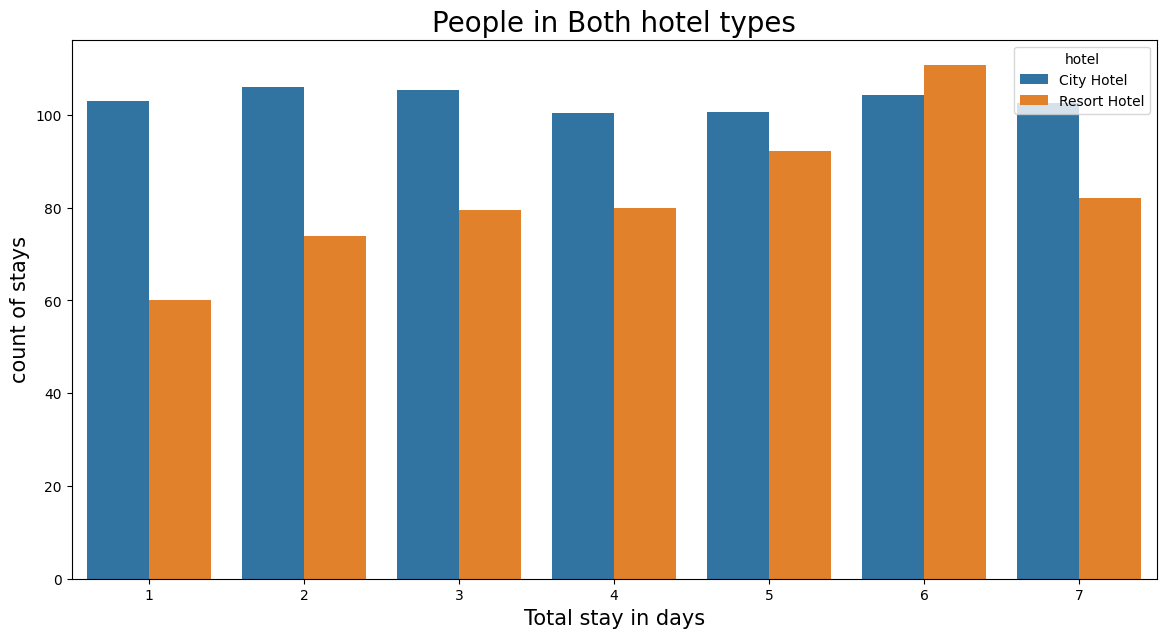

In [66]:
# taking those rows whose booking status is confirmed
dataset_hotel_nt_cancelled=dataset_hotel[(dataset_hotel['is_canceled']==0)]

#grouping adr as per number of stay and w.r.t. hotel
df_gp_total_stay_people_less7 = dataset_hotel_nt_cancelled.groupby(['Total_stay', 'hotel'])['adr'].median().reset_index(name="Mean of average daily rate by hotel")
#print(adr_vs_stay['Total_stay'].value_counts())

#taking only those rows whose stay duration is less thn or equal to 7.
df_gp_total_stay_people_less7=df_gp_total_stay_people_less7[df_gp_total_stay_people_less7['Total_stay']<=7]

plt.figure(figsize=(14,7))# setting chart/figure size
sns.barplot(x='Total_stay',y='Mean of average daily rate by hotel', data=df_gp_total_stay_people_less7,hue='hotel') #plotting barplot
plt.title('People in Both hotel types', fontsize=20)# setting title
plt.xlabel('Total stay in days',fontsize=15)# setting xlabel
plt.ylabel('count of stays', fontsize=15)# setting ylabel
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To compare proportions of one categorical variable within the same level of another, I use grouped barcharts. To show  total stay Vs. adr column I use bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. For both the hotel, as the number days of stay increases average daily rate is also increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Larger stay of customer will make positive impact on business.

#### Chart - 18  Total People Vs. ADR (Bivariate with Numerical - Numerical)

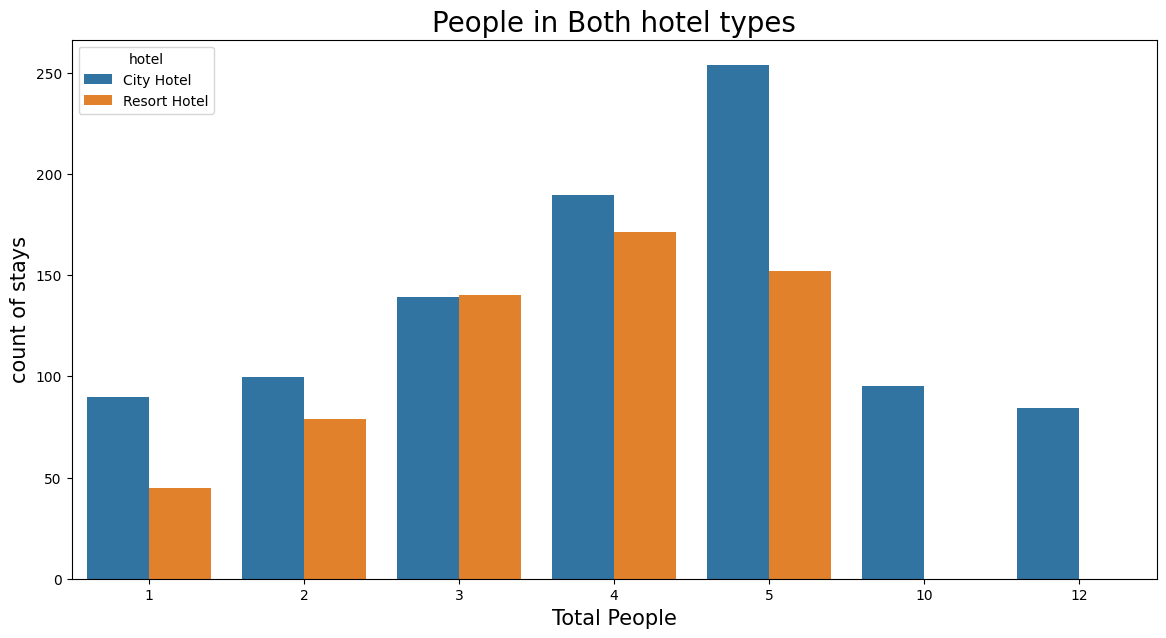

In [68]:
# taking those rows whose booking status is confirmed
#dataset_hotel_nt_cancelled=dataset_hotel[(dataset_hotel['is_canceled']==0) ]

#grouping adr as per number of people and w.r.t. hotel
df_gp_total_People= dataset_hotel_nt_cancelled.groupby(['Total_People', 'hotel'])['adr'].median().reset_index(name="Mean of average daily rate by hotel")
#print(adr_vs_stay['Total_stay'].value_counts())

#df_gp_total_stay_people_less7=df_gp_total_stay_people_less7[df_gp_total_stay_people_less7['Total_stay']<=7]

plt.figure(figsize=(14,7))# setting chart/figure size
sns.barplot(x='Total_People',y='Mean of average daily rate by hotel', data=df_gp_total_People,hue='hotel')# plotting barplot
plt.title('People in Both hotel types', fontsize=20) #setting title
plt.xlabel('Total People',fontsize=15)# setting xlabel
plt.ylabel('Mean ADR', fontsize=15)# setting ylabel
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To compare proportions of one categorical variable within the same level of another, I use grouped barcharts. To show  total People Vs. adr column I use bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. For both the hotel, as the number people increases average daily rate is also increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. More People will make positive impact on business.

#### Chart - 19 Lead Time Vs. Hotel Vs Is_canceled (Multivariate with Numerical - Categorical- Categorical)

          hotel  is_canceled   lead_time
0  Resort Hotel            1  113.948361
1    City Hotel            1  102.054336
2  Resort Hotel            0   74.662041
3    City Hotel            0   68.380298



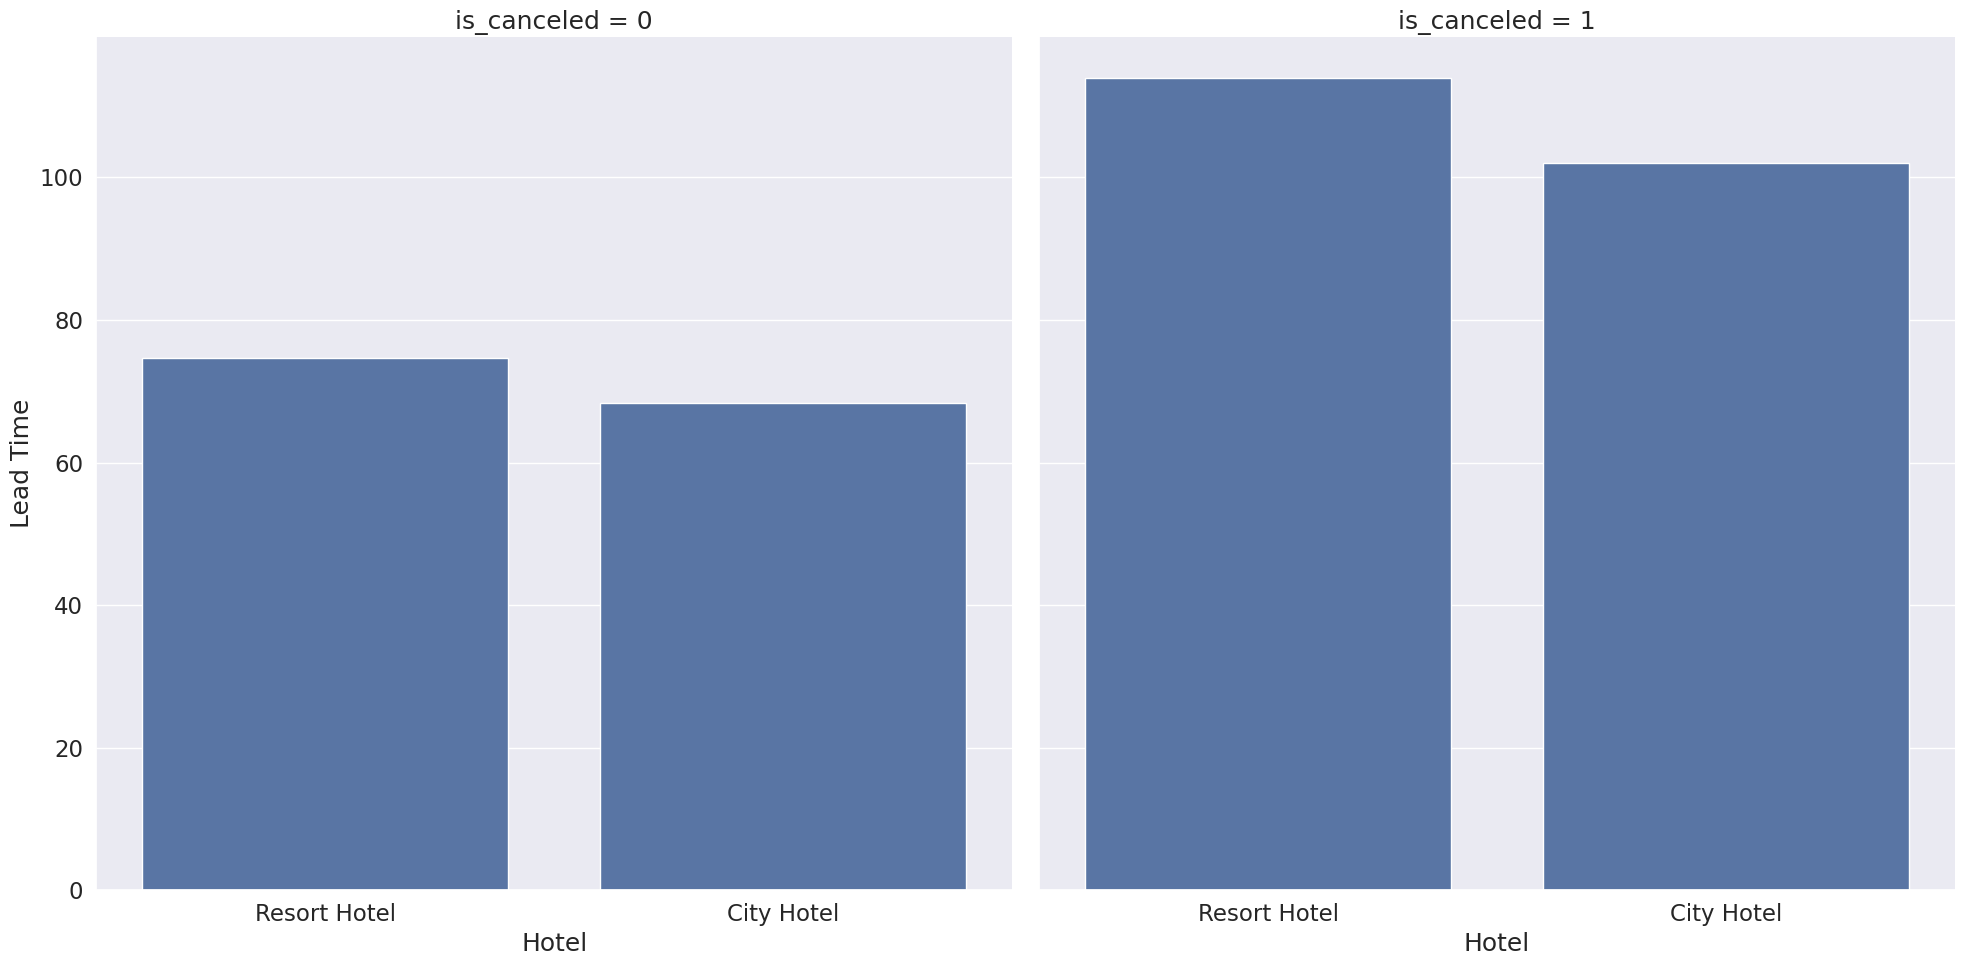

In [71]:
# grouping with leadtime and hotel and is_canceled column
df_gf_leadtime_vs_hotel= dataset_hotel.groupby(['hotel','is_canceled'])['lead_time'].mean().sort_values(ascending = False).reset_index()

print(df_gf_leadtime_vs_hotel)
print("")
sns.set(font_scale=1.5)#setting font_scale of seaborn diagram is 1
g = sns.FacetGrid(df_gf_leadtime_vs_hotel, col="is_canceled",height=10,margin_titles=True)# taking facetgrid object to plot conditional relationships.
g.map_dataframe(sns.barplot, x="hotel", y="lead_time")#plotting barplot
g.set_xlabels('Hotel')# setting xlabel
g.set_ylabels('Lead Time') # setting ylabel



##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To compare proportions of one categorical variable within the same level of another. To show  Lead Time Vs. hotel vs Is_canceled column I use bar chart..

##### 2. What is/are the insight(s) found from the chart?

1. Lead time for cancelled booking is more for noth the hotel compared to non cancelled booking.
2. Resort hotel has slightly more lead time compared to city hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. More lead time can responsible for cancelled booking, so it is negatively impact on the business.

#### Chart - 20 Waiting Time Vs. Hotel (Multivariate with Numerical - Categorical- Categorical)

In [ ]:
df_gf_leadtime_vs_hotel= dataset_hotel.groupby(['hotel','is_canceled'])['days_in_waiting_list'].mean().sort_values(ascending = False).reset_index()  # group by leadtime and hotel

print(df_gf_leadtime_vs_hotel)
print("")
g = sns.FacetGrid(df_gf_leadtime_vs_hotel, col="is_canceled",height=10,margin_titles=True)# taking facetgrid object to plot conditional relationships.
g.map_dataframe(sns.barplot, x="hotel", y="days_in_waiting_list") # plotting barplot
g.set_xlabels('Hotel') # setting xlabel
g.set_ylabels('Lead Time') # setting ylabel

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To compare proportions of one categorical variable within the same level of another. To show  Lead Time Vs. hotel vs Is_canceled column I use bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. City hotel's waiting time is more compared to resort hotel.
2. Those booking are cancelled in city hotel have longer waiting time compared to non cancelled booking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. City hotel's are busier than Resort hotel as it's waiting time is more than that of resort hotels.

#### Chart - 21 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
sns.set(font_scale=1) #setting font_scale of seaborn diagram is 1
plt.figure(figsize=(20,10)) # setting chart/figure size
sns.heatmap(dataset_hotel.corr(),annot=True) # plot heatmap
plt.title('Co-relation of the columns') # plotting title

##### 1. Why did you pick the specific chart?

A correlation matrix is a square matrix showing the correlation coefficients between two variables.The strength and direction of the relationship between two variables in a straight line are determined by the correlation coefficient. In multivariate analysis and statistics, a correlation matrix is typically used to explore the relationships between several variables.

##### 2. What is/are the insight(s) found from the chart?

1. Is repeated guest is positivelly correlated with booking not cancelled.
2. Total people is positivelly correlated with adr.

#### Chart - 22 - Pair Plot

In [ ]:
# selecting only numerical column
df_numeric=dataset_hotel[['lead_time', 'arrival_date_year','is_canceled',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'Total_stay',
        'Total_People',
        'previous_cancellations',  'booking_changes',
        'days_in_waiting_list',  'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]]
# Pair Plot visualization code
sns.pairplot(df_numeric, hue="is_canceled")

##### 1. Why did you pick the specific chart?

Pair plots are used to determine the best combination of features to describe a connection between two variables. Additionally, it is beneficial to create some straightforward classification models by making linear separations in our data or drawing some simple lines.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot I can say data is not linearly seperable.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. I think more lead time chances to cancel the booking more so we can restrict the lead time for some predefined days.
2. As repeated guest ratio is very less , we can take feedback from customer and improve the service.
3. Also we can give offers to previous customer .
4. There are less booking from November to January , so in order to attact the booking we can offer them low tariff plan.

# **Conclusion**

1. City hotel is having 61.1% booking while Resort hotel have 38.9 booking, i.e. city hotel have maximum booking.
2. Among total booking, 27.9% are cancelled their booking.
3. Only 3.4% are repeated customer, i.e. rentation rate is very low.
4. BB Type of meal is most prefereed meal.
5. We have approximately 60% booking from Online TA market segment.
6. Almost 80% of booking from TA/TO distribution channel.
7. 82% customer are of Transient type.
8. Customer preferred to reserve room type A.
9. Most of the customer are coming from Portugal Country.
10.Maximum booking are happen in month of August.
11. Agent No 9 has booked highest booking almost 34%.
12. Ideal stay for both the hotel is leaa than 7.
13. For longer stay customer prefer to book Resort hotel.
14. Average daily rate of city hotel is higher than resort hotel.
15. More lead time increase chances of cancel the booking is more.
16. Waiting time of city hotel is more than resort hotel.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***